# UK House Price Prediction

Taken from Kaggle:

```
This dataset has been meticulously pre-processed from the official UK government’s Price Paid Data, available for research purposes. The original dataset contains millions of rows spanning from 1995 to 2024, which posed significant challenges for machine learning operations due to its large size. For this project, we focused on house price predictions and filtered the data to only include transactions from 2015 to 2024. The final dataset contains 90,000 randomly sampled records, which should be ideal for training machine learning models efficiently.
The goal of this dataset is to provide a well-structured, pre-processed dataset for students, researchers, and developers interested in creating house price prediction models using UK data. There are limited UK house price datasets available on Kaggle, so this contribution aims to fill that gap, offering a reliable dataset for dissertations, academic projects, or research purposes.
This dataset is tailored for use in supervised learning models and has been cleaned, ensuring the removal of missing values and encoding of categorical variables. We hope this serves as a valuable resource for anyone studying house price prediction or real estate trends in the UK.
In the future, I plan to provide an even larger dataset for more detailed and comprehensive predictions.
```

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ml_utils import utils

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('input/uk_house_price.csv', parse_dates=['date'])
df = df.sort_values('date', ascending=True).reset_index(drop=True)
df.head()

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
0,310000,2015-01-02,TN21 9HJ,S,N,F,NORTH CORNER,HORAM,HEATHFIELD,WEALDEN,EAST SUSSEX
1,85000,2015-01-02,NG17 7EH,T,N,F,KINGSWAY,KIRKBY IN ASHFIELD,NOTTINGHAM,ASHFIELD,NOTTINGHAMSHIRE
2,235000,2015-01-02,NG23 7LD,D,N,F,DYKES END,COLLINGHAM,NEWARK,NEWARK AND SHERWOOD,NOTTINGHAMSHIRE
3,368000,2015-01-02,L37 3NU,D,N,L,GORES LANE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE
4,365500,2015-01-05,EN8 9RX,S,N,F,GIBBS CLOSE,CHESHUNT,WALTHAM CROSS,BROXBOURNE,HERTFORDSHIRE


## 1st Exploration

### EDA

In [4]:
df.sample(10, random_state=29)

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
73585,100000,2022-03-31,BL1 5JY,T,N,L,DOUGILL STREET,HEATON,BOLTON,BOLTON,GREATER MANCHESTER
70169,260000,2021-11-26,EX5 4BD,S,N,F,CULVERT ROAD,STOKE CANON,EXETER,EAST DEVON,DEVON
5635,110000,2015-08-28,SA11 5LH,S,N,F,BRYNIVOR,PONTWALBY,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
83004,190000,2023-03-22,CV5 8LQ,S,N,F,LYNDALE ROAD,WHOBERLEY,COVENTRY,COVENTRY,WEST MIDLANDS
56003,127000,2020-10-29,CF82 7TH,T,N,F,CLOS CAE MAWR,PENPEDAIRHEOL,HENGOED,CAERPHILLY,CAERPHILLY
46764,475000,2019-09-30,TN24 9PX,D,N,F,HARRY PAY CLOSE,KENNINGTON,ASHFORD,ASHFORD,KENT
65713,269000,2021-06-30,CA12 4TU,T,N,F,GLENDERAMACKIN TERRACE,THRELKELD,KESWICK,ALLERDALE,CUMBRIA
37628,600000,2018-10-29,CW8 3PE,T,N,F,WELL LANE,WEAVERHAM,NORTHWICH,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER
40126,1000,2019-01-29,GL51 3TS,O,N,F,THE OAKS,UP HATHERLEY,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE
56989,172500,2020-11-25,LL53 6LA,T,N,F,GLYNLLIFON TERRACE,NEFYN,PWLLHELI,GWYNEDD,GWYNEDD


In [5]:
utils.skim_data(df)

Total duplicate rows: 43
DF shape: (90000, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,price,int64,0.0,0.0,0.0,6111,6.79,"[310000, 85000, 235000, 368000, 365500]"
1,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
2,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
3,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
4,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
5,freehold,object,0.0,-,-,2,0.00,"[F, L]"
6,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
7,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
8,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
9,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."


In [6]:
# rearrange columns

columns = list(df.columns.values)
columns.pop(0)
columns.append('price')
df = df[columns]
df.sample(10, random_state=29)

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price
73585,2022-03-31,BL1 5JY,T,N,L,DOUGILL STREET,HEATON,BOLTON,BOLTON,GREATER MANCHESTER,100000
70169,2021-11-26,EX5 4BD,S,N,F,CULVERT ROAD,STOKE CANON,EXETER,EAST DEVON,DEVON,260000
5635,2015-08-28,SA11 5LH,S,N,F,BRYNIVOR,PONTWALBY,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,110000
83004,2023-03-22,CV5 8LQ,S,N,F,LYNDALE ROAD,WHOBERLEY,COVENTRY,COVENTRY,WEST MIDLANDS,190000
56003,2020-10-29,CF82 7TH,T,N,F,CLOS CAE MAWR,PENPEDAIRHEOL,HENGOED,CAERPHILLY,CAERPHILLY,127000
46764,2019-09-30,TN24 9PX,D,N,F,HARRY PAY CLOSE,KENNINGTON,ASHFORD,ASHFORD,KENT,475000
65713,2021-06-30,CA12 4TU,T,N,F,GLENDERAMACKIN TERRACE,THRELKELD,KESWICK,ALLERDALE,CUMBRIA,269000
37628,2018-10-29,CW8 3PE,T,N,F,WELL LANE,WEAVERHAM,NORTHWICH,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,600000
40126,2019-01-29,GL51 3TS,O,N,F,THE OAKS,UP HATHERLEY,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE,1000
56989,2020-11-25,LL53 6LA,T,N,F,GLYNLLIFON TERRACE,NEFYN,PWLLHELI,GWYNEDD,GWYNEDD,172500


#### Date

##### Year

In [7]:
df_temp = df.copy()
df_temp['year'] = df_temp['date'].dt.year # type: ignore
df_temp.head()

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price,year
0,2015-01-02,TN21 9HJ,S,N,F,NORTH CORNER,HORAM,HEATHFIELD,WEALDEN,EAST SUSSEX,310000,2015
1,2015-01-02,NG17 7EH,T,N,F,KINGSWAY,KIRKBY IN ASHFIELD,NOTTINGHAM,ASHFIELD,NOTTINGHAMSHIRE,85000,2015
2,2015-01-02,NG23 7LD,D,N,F,DYKES END,COLLINGHAM,NEWARK,NEWARK AND SHERWOOD,NOTTINGHAMSHIRE,235000,2015
3,2015-01-02,L37 3NU,D,N,L,GORES LANE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,368000,2015
4,2015-01-05,EN8 9RX,S,N,F,GIBBS CLOSE,CHESHUNT,WALTHAM CROSS,BROXBOURNE,HERTFORDSHIRE,365500,2015


In [8]:
df_temp.groupby('year').size()

year
2015     9331
2016     9919
2017    10218
2018    10134
2019    10018
2020     8876
2021    12736
2022    10278
2023     6854
2024     1636
dtype: int64

##### Month

In [9]:
df_temp = df.copy()
df_temp['month'] = df_temp['date'].dt.month # type: ignore
df_temp['year'] = df_temp['date'].dt.year # type: ignore
df_temp = df_temp.sort_values('month')
df_temp.shape

(90000, 13)

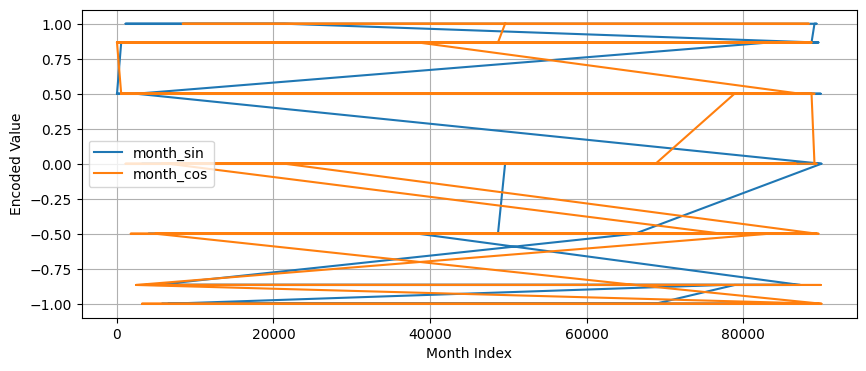

In [10]:
df_temp['month_sin'] = np.sin(2 * np.pi * df_temp['month'] / 12)
df_temp['month_cos'] = np.cos(2 * np.pi * df_temp['month'] / 12)

fig, ax = plt.subplots(figsize=(10, 4))
df_temp[['month_sin', 'month_cos']].plot(ax=ax)
plt.xlabel('Month Index')
plt.ylabel('Encoded Value')
plt.grid(True)
plt.show()

In [11]:
df_temp.sample(10, random_state=29)

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price,month,year,month_sin,month_cos
87040,2023-10-19,SO53 2HP,S,N,F,HILLCREST AVENUE,CHANDLER'S FORD,EASTLEIGH,EASTLEIGH,HAMPSHIRE,390000,10,2023,-8.660254e-01,5.000000e-01
56192,2020-10-30,TS25 1DR,S,N,F,GLENTOWER GROVE,SEATON CAREW,HARTLEPOOL,HARTLEPOOL,HARTLEPOOL,127000,10,2020,-8.660254e-01,5.000000e-01
59196,2021-01-28,WD25 7LJ,D,N,F,HIGH ROAD,LEAVESDEN,WATFORD,WATFORD,HERTFORDSHIRE,860000,1,2021,5.000000e-01,8.660254e-01
9047,2015-12-18,PO1 5AR,T,N,F,CORNWALL ROAD,FRATTON,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,151000,12,2015,-2.449294e-16,1.000000e+00
44991,2019-08-01,S45 8JD,S,N,F,OLD HALL CLOSE,PILSLEY,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,165000,8,2019,-8.660254e-01,-5.000000e-01
53053,2020-07-07,OX15 5FN,T,N,L,WARMINGTON ROAD,LOWER BRAILES,BANBURY,STRATFORD-ON-AVON,WARWICKSHIRE,164500,7,2020,-5.000000e-01,-8.660254e-01
77969,2022-09-02,SN5 7EJ,T,N,F,DENBECK WOOD,EASTLEAZE,SWINDON,SWINDON,SWINDON,171000,9,2022,-1.000000e+00,-1.836970e-16
75805,2022-06-23,TR27 4QE,S,N,F,FORTH AN TEWENNOW,PHILLACK,HAYLE,CORNWALL,CORNWALL,327000,6,2022,1.224647e-16,-1.000000e+00
13576,2016-06-22,NN9 6NX,D,N,F,SHELMERDINE RISE,RAUNDS,WELLINGBOROUGH,EAST NORTHAMPTONSHIRE,NORTHAMPTONSHIRE,279950,6,2016,1.224647e-16,-1.000000e+00
45886,2019-08-30,DN14 0PQ,S,Y,F,THE HEDGEROWS,EGGBOROUGH,GOOLE,SELBY,NORTH YORKSHIRE,134995,8,2019,-8.660254e-01,-5.000000e-01


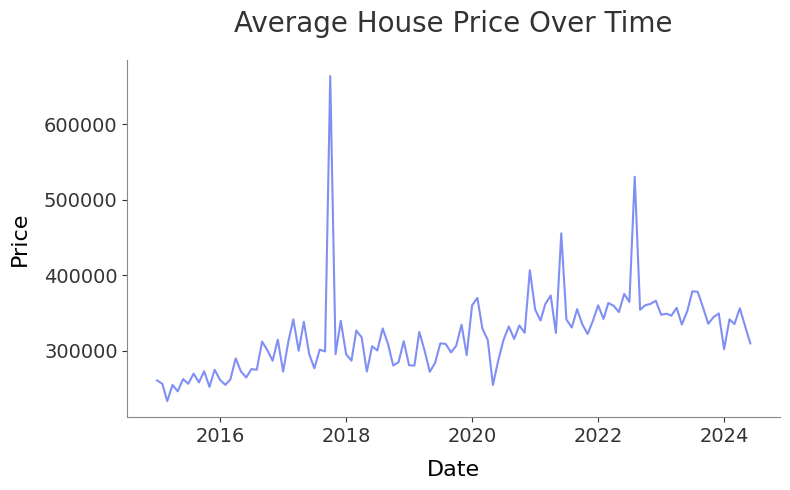

In [12]:
import matplotlib.dates as mdates

df_temp['month_year'] = df_temp['date'].dt.strftime('%Y_%m') # type: ignore
df_temp['month_year'] = pd.to_datetime(df_temp['month_year'], format='%Y_%m')
df_plot = df_temp.groupby('month_year')['price'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_plot['month_year'], df_plot['price'], color='#5f73f2', alpha=0.8, linewidth=1.5)

ax.set_title('Average House Price Over Time', fontsize=20, pad=20, color='#333333')
ax.set_xlabel('Date', fontsize=16, labelpad=10)
ax.set_ylabel('Price', fontsize=16, labelpad=10)

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

ax.tick_params(axis='both', which='major', labelsize=14, colors='#333333')

ax.set_facecolor('white')

plt.tight_layout()
plt.show()


#### Street

In [20]:
utils.skim_data(df)

Total duplicate rows: 43
DF shape: (90000, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


In [33]:
from rapidfuzz import process, fuzz

def clean_high_cardinality_feature(df, column_name, replace=False):
    df_copy = df.copy()
    df_copy[column_name] = (
        df_copy[column_name]
        .str.lower()
        .str.replace(r'[^\w\s]', ' ', regex=True)
    )

    street_counts = df_copy[column_name].value_counts()
    masters = street_counts[street_counts > 5].index.tolist()
    candidates = street_counts[street_counts <= 5].index.tolist()

    def find_best_match(query, choices, threshold=90):
        result = process.extractOne(query, choices, scorer=fuzz.token_sort_ratio)
        if result and result[1] >= threshold:
            return result[0]
        return query

    corrections = {cand: find_best_match(cand, masters) for cand in candidates}
    if replace:
        df_copy[column_name] = df_copy[column_name].replace(corrections)
    else:
        df_copy[f'{column_name}_cleaned'] = df_copy[column_name].replace(corrections)
    return df_copy

df_copy = clean_high_cardinality_feature(df, 'street')
utils.skim_data(df_copy)

Total duplicate rows: 43
DF shape: (90000, 12)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43481,48.31,"[north corner, kingsway, dykes end, gores lane..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


#### Locality

In [34]:
df_copy = clean_high_cardinality_feature(df, 'locality')
utils.skim_data(df_copy)

Total duplicate rows: 43
DF shape: (90000, 12)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10138,11.26,"[horam, kirkby in ashfield, collingham, formby..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


#### Town

In [36]:
df_copy = clean_high_cardinality_feature(df, 'town')
utils.skim_data(df_copy)

Total duplicate rows: 43
DF shape: (90000, 12)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[heathfield, nottingham, newark, liverpool, wa..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


#### District

In [37]:
df_copy = clean_high_cardinality_feature(df, 'district')
utils.skim_data(df_copy)

Total duplicate rows: 43
DF shape: (90000, 12)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[wealden, ashfield, newark and sherwood, sefto..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


#### County

In [38]:
df_copy = clean_high_cardinality_feature(df, 'county')
utils.skim_data(df_copy)

Total duplicate rows: 43
DF shape: (90000, 12)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[east sussex, nottinghamshire, merseyside, her..."


### Feature Engineering

#### Category Encoder

In [18]:
from category_encoders import TargetEncoder

data = {
    'District': ['Adur', 'Adur', 'Arun', 'Arun', 'Barking', 'Barking'],
    'Price': [350000, 360000, 420000, 410000, 310000, 305000]
}
df_temp = pd.DataFrame(data)
encoder = TargetEncoder(cols=['District'], smoothing=10)
df_temp['District_Encoded'] = encoder.fit_transform(df_temp[['District']], df_temp['Price'])
df_temp[['District', 'District_Encoded']]

,District,District_Encoded
0,Adur,358575.620563
1,Adur,358575.620563
2,Arun,367086.684457
3,Arun,367086.684457
4,Barking,351837.694980
5,Barking,351837.694980


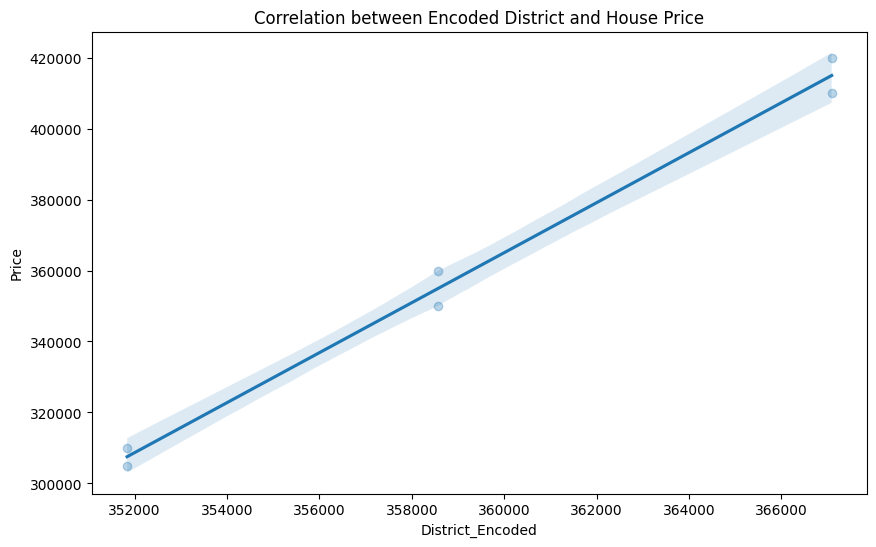

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='District_Encoded', y='Price', data=df_temp, scatter_kws={'alpha':0.3})
plt.title('Correlation between Encoded District and House Price')
plt.show()